### 1.下載並解壓縮資料集

In [2]:
!wget -q --show-progress http://files.grouplens.org/datasets/movielens/ml-10m.zip
!wget -q --show-progress http://files.grouplens.org/datasets/tag-genome/tag-genome.zip
!unzip ml-10m.zip
!unzip tag-genome.zip

ml-10m.zip          100%[===================>]  62.53M  42.0MB/s    in 1.5s    
tag-genome.zip      100%[===================>]  41.49M  61.2MB/s    in 0.7s    
Archive:  ml-10m.zip
   creating: ml-10M100K/
  inflating: ml-10M100K/allbut.pl    
  inflating: ml-10M100K/movies.dat   
  inflating: ml-10M100K/ratings.dat  
  inflating: ml-10M100K/README.html  
  inflating: ml-10M100K/split_ratings.sh  
  inflating: ml-10M100K/tags.dat     
Archive:  tag-genome.zip
   creating: tag-genome/
  inflating: tag-genome/README.htm   
  inflating: tag-genome/movies.dat   
  inflating: tag-genome/tags.dat     
  inflating: tag-genome/tag_relevance.dat  


## 2.檢視資料

In [3]:
import pandas as pd
import os

DATA_DIR = 'ml-10M100K'
SEPARATOR = '::'

# Read movies.dat
movies_df = pd.read_csv(os.path.join(DATA_DIR, 'movies.dat'),
                        sep=SEPARATOR,
                        engine='python', # 'python' engine is needed for multi-character delimiters
                        names=['MovieID', 'Title', 'Genres'],
                        encoding='latin-1') # Specify encoding if there are special characters

print('Movies DataFrame head:')
display(movies_df.head())


Movies DataFrame head:


,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Read ratings.dat
ratings_df = pd.read_csv(os.path.join(DATA_DIR, 'ratings.dat'),
                          sep=SEPARATOR,
                          engine='python',
                          names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

print('\nRatings DataFrame head:')
display(ratings_df.head())



Ratings DataFrame head:


,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


# Task
Analyze the `movies_df` and `ratings_df` DataFrames by performing the following steps:

1.  **Data Overview**:
    *   Examine the data types and basic information of both DataFrames.
    *   Check for missing values in each DataFrame.
    *   Generate descriptive statistics for numerical columns.
    *   Count unique values for key columns like `MovieID`, `UserID`, `Rating`, and `Genres`.

2.  **Rating Distribution Analysis**:
    *   Analyze the distribution of the `Rating` column in `ratings_df`.
    *   Create a histogram to visualize the frequency of each rating value.

3.  **Movie Genre Analysis**:
    *   Process the `Genres` column in `movies_df` to handle multiple genres per movie, splitting them into individual entries.
    *   Calculate the frequency of each genre.
    *   Create a bar chart to visualize the most common movie genres.

4.  **Movie and User Activity Analysis**:
    *   Identify and visualize the movies with the highest number of ratings.
    *   Calculate the average rating for each movie and identify the top movies with the highest average ratings, considering a minimum number of ratings to avoid bias from movies with few ratings.
    *   Identify and visualize the most active users (users with the highest number of ratings).

5.  **Rating Time Trend Analysis**:
    *   Convert the `Timestamp` column in `ratings_df` to a datetime format.
    *   Analyze and visualize the trend of ratings over time, such as the number of ratings per year or month using a line plot.

6.  **Key Findings**: Summarize the important insights gained from the EDA to understand the characteristics of the dataset.

## 資料概覽

### Subtask:
檢查 `movies_df` 和 `ratings_df` 的基本資訊，包括資料類型、缺失值、描述性統計，以及關鍵欄位的唯一值數量，以初步了解資料結構和品質。


**Reasoning**:
To understand the basic structure and quality of the `movies_df` and `ratings_df` dataframes, I will display their information, check for missing values, generate descriptive statistics, and count unique values for key columns, as requested by the subtask instructions.



In [5]:
print('--- movies_df Info ---')
movies_df.info()
print('\n--- ratings_df Info ---')
ratings_df.info()

print('\n--- Missing Values in movies_df ---')
print(movies_df.isnull().sum())
print('\n--- Missing Values in ratings_df ---')
print(ratings_df.isnull().sum())

print('\n--- Descriptive Statistics for movies_df ---')
display(movies_df.describe(include='all'))
print('\n--- Descriptive Statistics for ratings_df ---')
display(ratings_df.describe(include='all'))

print('\n--- Unique values in movies_df ---')
print(f"Unique MovieIDs: {movies_df['MovieID'].nunique()}")
print(f"Unique Genres combinations: {movies_df['Genres'].nunique()}")

print('\n--- Unique values in ratings_df ---')
print(f"Unique UserIDs: {ratings_df['UserID'].nunique()}")
print(f"Unique MovieIDs: {ratings_df['MovieID'].nunique()}")
print(f"Unique Ratings: {ratings_df['Rating'].nunique()}")

--- movies_df Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  10681 non-null  int64 
 1   Title    10681 non-null  object
 2   Genres   10681 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.5+ KB

--- ratings_df Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserID     int64  
 1   MovieID    int64  
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB

--- Missing Values in movies_df ---
MovieID    0
Title      0
Genres     0
dtype: int64

--- Missing Values in ratings_df ---
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

--- Descriptive Statistics for movies_df ---


,MovieID,Title,Genres
count,10681.000000,10681,10681
unique,NaN,10680,797
top,NaN,War of the Worlds (2005),Drama
freq,NaN,2,1817
mean,13120.523546,NaN,NaN
std,17808.849139,NaN,NaN
min,1.000000,NaN,NaN
25%,2755.000000,NaN,NaN
50%,5436.000000,NaN,NaN
75%,8713.000000,NaN,NaN



--- Descriptive Statistics for ratings_df ---


,UserID,MovieID,Rating,Timestamp
count,1.000005e+07,1.000005e+07,1.000005e+07,1.000005e+07
mean,3.586986e+04,4.120291e+03,3.512422e+00,1.032606e+09
std,2.058534e+04,8.938402e+03,1.060418e+00,1.159640e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.812300e+04,6.480000e+02,3.000000e+00,9.467659e+08
50%,3.574050e+04,1.834000e+03,4.000000e+00,1.035476e+09
75%,5.360800e+04,3.624000e+03,4.000000e+00,1.126749e+09
max,7.156700e+04,6.513300e+04,5.000000e+00,1.231132e+09



--- Unique values in movies_df ---
Unique MovieIDs: 10681
Unique Genres combinations: 797

--- Unique values in ratings_df ---
Unique UserIDs: 69878
Unique MovieIDs: 10677
Unique Ratings: 10


## 評分分佈分析

### Subtask:
分析 `ratings_df` 中 `Rating` 欄位的分佈情況，包括繪製評分值的直方圖，以了解用戶給予評分的一般趨勢。


**Reasoning**:
To analyze the distribution of the 'Rating' column, I will first calculate the frequency of each rating value and then visualize this distribution using a histogram with appropriate labels and title.



Rating Distribution:
Rating
0.5      94988
1.0     384180
1.5     118278
2.0     790306
2.5     370178
3.0    2356676
3.5     879764
4.0    2875850
4.5     585022
5.0    1544812
Name: count, dtype: int64


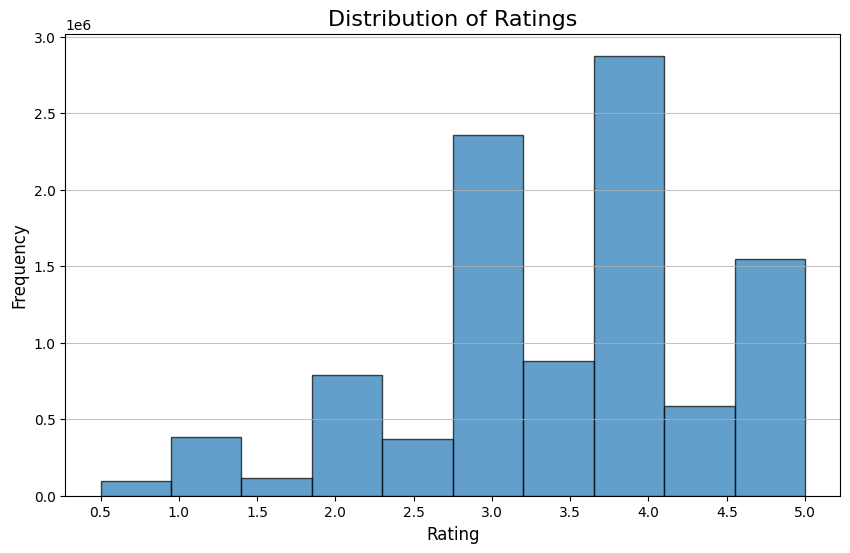

In [6]:
import matplotlib.pyplot as plt

# 1. 計算 `Rating` 欄位每個值的頻率
rating_counts = ratings_df['Rating'].value_counts().sort_index()
print('Rating Distribution:')
print(rating_counts)

# 3. 使用 `ratings_df` 中 `Rating` 欄位的數據創建一個直方圖
plt.figure(figsize=(10, 6))
plt.hist(ratings_df['Rating'], bins=10, edgecolor='black', alpha=0.7)

# 4. 為直方圖添加標題
plt.title('Distribution of Ratings', fontsize=16)

# 5. 為 x 軸和 y 軸添加標籤
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set x-axis ticks to show all possible rating values (0.5 to 5.0 with 0.5 increments)
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

plt.grid(axis='y', alpha=0.75)

# 6. 顯示圖表
plt.show()

## 電影類型分析

### Subtask:
處理 `movies_df` 中的 `Genres` 欄位，將多個類型拆分為獨立的項目，然後統計各類型電影的出現頻率，並繪製最常見電影類型的長條圖。


**Reasoning**:
To analyze movie genres, I will first split the 'Genres' column by the '|' delimiter and then use `explode` to create a new row for each genre. After that, I will count the occurrences of each genre to get their frequencies.



In [7]:
genres_df = movies_df.assign(Genres=movies_df['Genres'].str.split('|')).explode('Genres')

genre_counts = genres_df['Genres'].value_counts()
print('Top 10 Genres and their counts:')
print(genre_counts.head(10))

Top 10 Genres and their counts:
Genres
Drama        5339
Comedy       3703
Thriller     1706
Romance      1685
Action       1473
Crime        1118
Adventure    1025
Horror       1013
Sci-Fi        754
Fantasy       543
Name: count, dtype: int64


**Reasoning**:
To visualize the frequency of each movie genre, I will create a bar chart using the `genre_counts` data, ensuring it has appropriate labels, a title, and displays the top genres clearly.



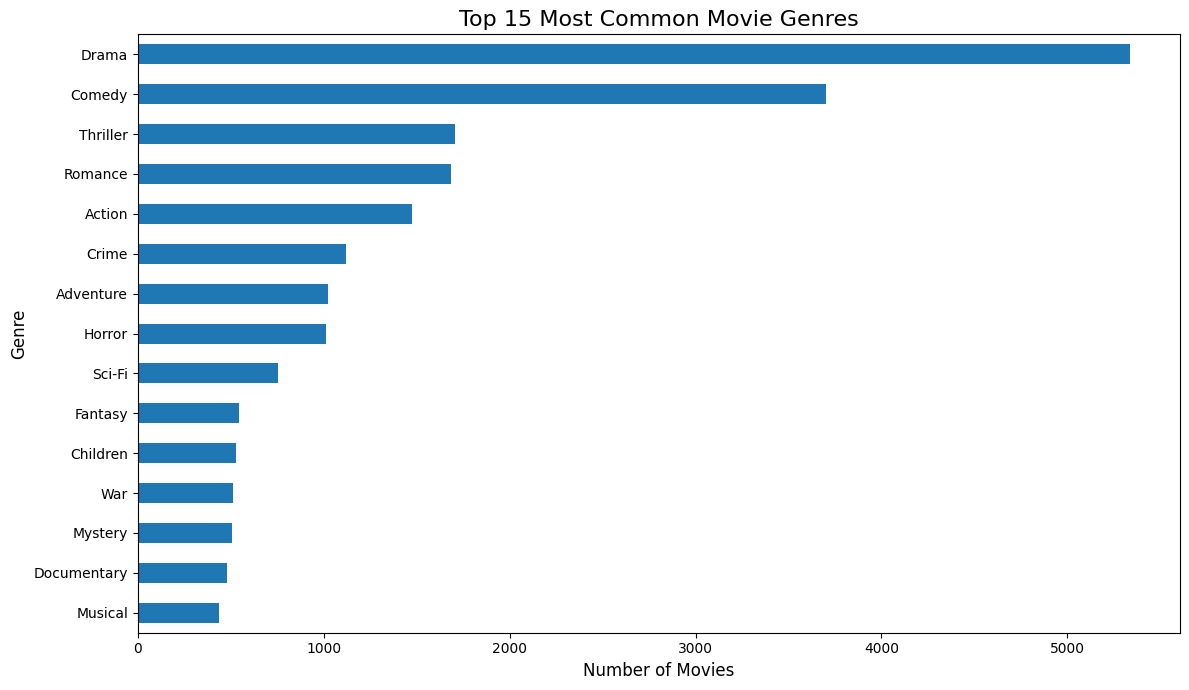

In [8]:
import matplotlib.pyplot as plt

# Create a bar chart for the top N genres
plt.figure(figsize=(12, 7))
genre_counts.head(15).sort_values(ascending=True).plot(kind='barh')

# Add title and labels
plt.title('Top 15 Most Common Movie Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## 電影和用戶活躍度分析

### Subtask:
分析電影被評分的數量和用戶的評分次數。這包括找出評分次數最多的電影、平均評分最高的電影（考慮最低評分次數以避免偏頗），以及最活躍的用戶（評分次數最多的用戶），並繪製相關的長條圖以視覺化結果。


**Reasoning**:
The first instruction is to calculate the number of ratings for each movie and display the top 10. I will use `value_counts()` on the 'MovieID' column of `ratings_df` to achieve this.



In [9]:
movie_rating_counts = ratings_df['MovieID'].value_counts()
print('Top 10 Movies by Rating Count:')
print(movie_rating_counts.head(10))

Top 10 Movies by Rating Count:
MovieID
296    34864
356    34457
593    33668
480    32631
318    31126
110    29154
457    28951
589    28948
260    28566
150    27035
Name: count, dtype: int64


**Reasoning**:
To visualize the top 20 movies by rating count, I will use the `movie_rating_counts` Series, select the top 20, and create a horizontal bar chart with appropriate labels and title.



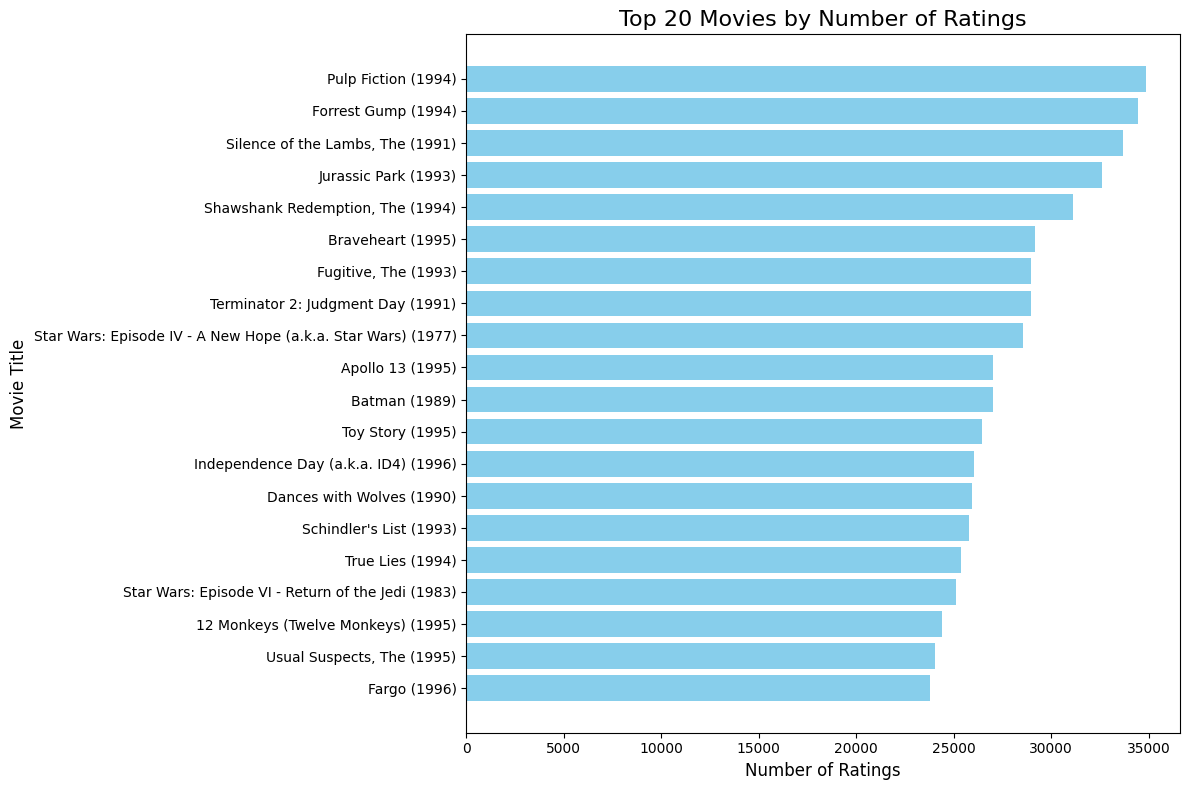

In [10]:
import matplotlib.pyplot as plt

# Get the top 20 movies by rating count
top_20_movies_by_ratings = movie_rating_counts.head(20)

# Merge with movies_df to get movie titles
top_20_movies_titles = pd.merge(top_20_movies_by_ratings.to_frame(name='rating_count'), movies_df, on='MovieID', how='left')

# Sort by rating count for better visualization
top_20_movies_titles = top_20_movies_titles.sort_values(by='rating_count', ascending=True)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_20_movies_titles['Title'], top_20_movies_titles['rating_count'], color='skyblue')

# Add title and labels
plt.title('Top 20 Movies by Number of Ratings', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Reasoning**:
To calculate the average rating for each movie and merge it with the movie rating counts, I will group the `ratings_df` by `MovieID` and compute the mean of the `Rating` column. Then, I will merge this average rating DataFrame with the existing `movie_rating_counts` Series.



In [11]:
movie_avg_ratings = ratings_df.groupby('MovieID')['Rating'].mean()

# Merge movie_avg_ratings with movie_rating_counts
movie_stats = pd.DataFrame({
    'rating_count': movie_rating_counts,
    'avg_rating': movie_avg_ratings
}).reset_index()
movie_stats = pd.merge(movie_stats, movies_df[['MovieID', 'Title']], on='MovieID', how='left')

print('Movies with average ratings and counts head:')
display(movie_stats.head())

Movies with average ratings and counts head:


,MovieID,rating_count,avg_rating,Title
0,1,26449,3.928769,Toy Story (1995)
1,2,12032,3.208070,Jumanji (1995)
2,3,7790,3.150385,Grumpier Old Men (1995)
3,4,1764,2.860544,Waiting to Exhale (1995)
4,5,7135,3.077435,Father of the Bride Part II (1995)


**Reasoning**:
To identify top movies with high average ratings, I will first filter the `movie_stats` DataFrame to include only movies that meet a minimum rating threshold, and then sort these filtered movies by their average rating to display the top 10.



In [12]:
min_ratings = 50

filtered_movies = movie_stats[movie_stats['rating_count'] >= min_ratings]
top_rated_movies = filtered_movies.sort_values(by='avg_rating', ascending=False)

print(f'Top 10 Movies with highest average ratings (min {min_ratings} ratings):')
display(top_rated_movies.head(10))

Top 10 Movies with highest average ratings (min 50 ratings):


,MovieID,rating_count,avg_rating,Title
315,318,31126,4.457238,"Shawshank Redemption, The (1994)"
843,858,19814,4.415085,"Godfather, The (1972)"
49,50,24037,4.367142,"Usual Suspects, The (1995)"
523,527,25777,4.363483,Schindler's List (1993)
905,922,3255,4.321966,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
895,912,12507,4.319741,Casablanca (1942)
887,904,8825,4.316544,Rear Window (1954)
3348,3435,2403,4.315439,Double Indemnity (1944)
1935,2019,5751,4.314119,Seven Samurai (Shichinin no samurai) (1954)
1186,1212,3265,4.313629,"Third Man, The (1949)"


**Reasoning**:
To visualize the top 20 movies by average rating, I will take the `top_rated_movies` DataFrame (which is already filtered by minimum ratings and sorted by average rating), select the top 20 entries, and create a horizontal bar chart.



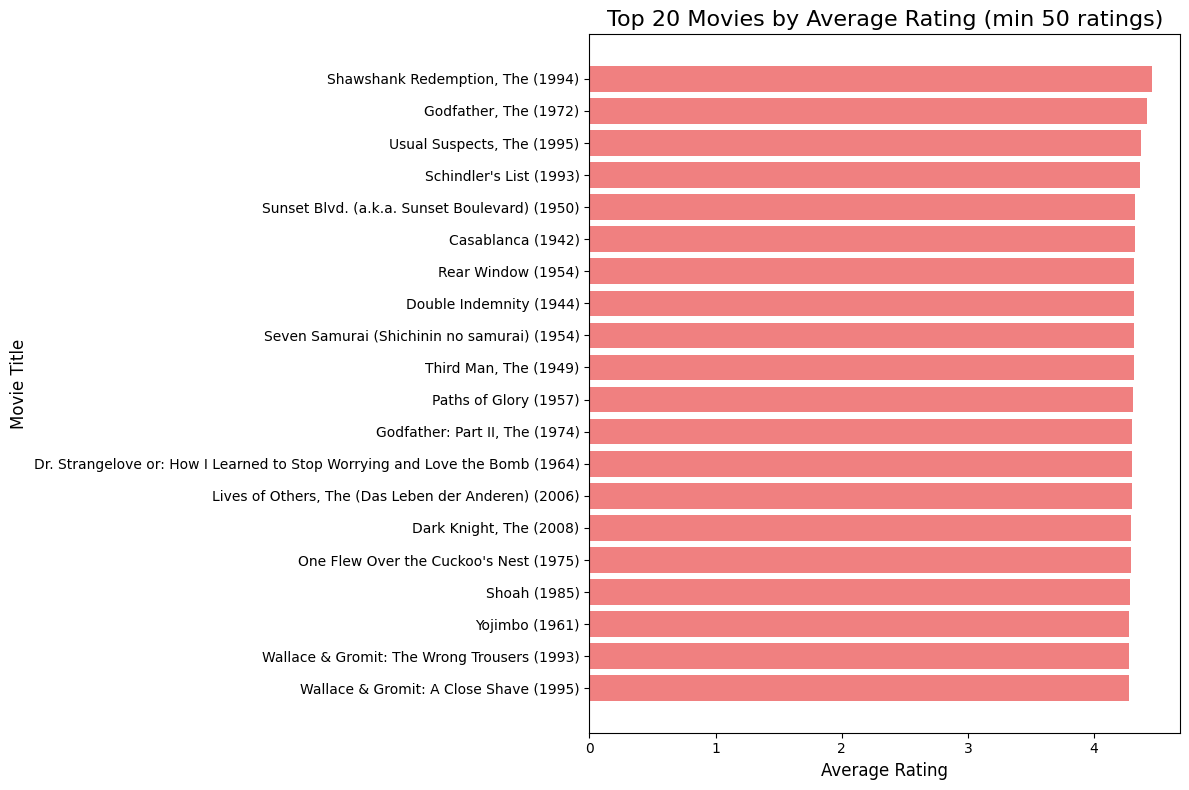

In [13]:
import matplotlib.pyplot as plt

# Get the top 20 movies by average rating
top_20_avg_rated_movies = top_rated_movies.head(20).sort_values(by='avg_rating', ascending=True)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_20_avg_rated_movies['Title'], top_20_avg_rated_movies['avg_rating'], color='lightcoral')

# Add title and labels
plt.title(f'Top 20 Movies by Average Rating (min {min_ratings} ratings)', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Reasoning**:
Now that we have analyzed movies by rating counts and average ratings, the next step is to analyze user activity. I will calculate the number of ratings made by each user and display the top 10 most active users, as per instruction 6.



In [14]:
user_rating_counts = ratings_df['UserID'].value_counts()
print('Top 10 Most Active Users by Rating Count:')
print(user_rating_counts.head(10))

Top 10 Most Active Users by Rating Count:
UserID
59269    7359
67385    7047
14463    5169
68259    4483
27468    4449
19635    4165
3817     4165
63134    3755
58357    3697
27584    3479
Name: count, dtype: int64


**Reasoning**:
To visualize the top 20 most active users by rating count, I will take the `user_rating_counts` Series, select the top 20, and create a horizontal bar chart with appropriate labels and title.



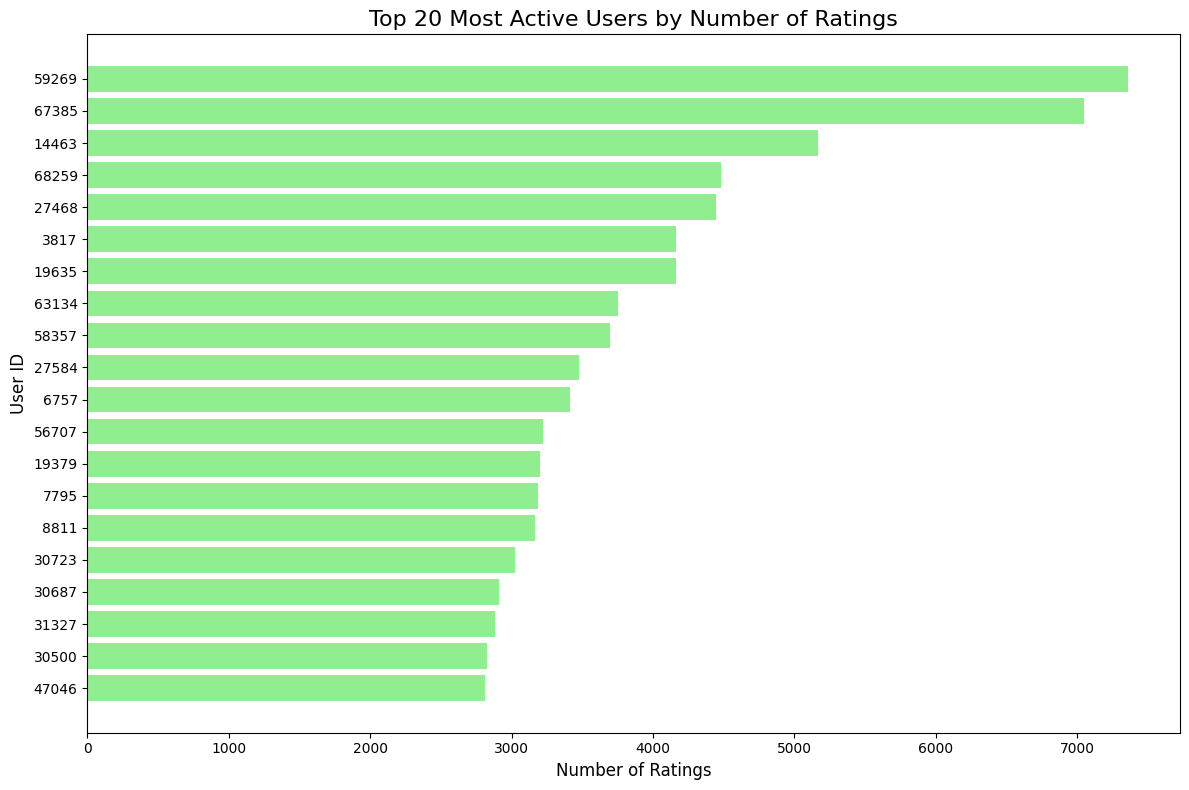

In [15]:
import matplotlib.pyplot as plt

# Get the top 20 most active users
top_20_active_users = user_rating_counts.head(20).sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_20_active_users.index.astype(str), top_20_active_users.values, color='lightgreen')

# Add title and labels
plt.title('Top 20 Most Active Users by Number of Ratings', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('User ID', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## 評分時間趨勢分析

### Subtask:
將 `ratings_df` 中的 `Timestamp` 欄位轉換為日期時間格式，然後分析隨著時間推移的評分趨勢，例如每年或每月評分數量的變化，並繪製折線圖。


**Reasoning**:
To perform time trend analysis, I need to convert the 'Timestamp' column from Unix timestamp to a readable datetime format. This is the first step as per the instructions.



In [16]:
ratings_df['Timestamp'] = pd.to_datetime(ratings_df['Timestamp'], unit='s')
print("Timestamp column converted to datetime format:")
display(ratings_df.head())

Timestamp column converted to datetime format:


,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,1996-08-02 11:24:06
1,1,185,5.0,1996-08-02 10:58:45
2,1,231,5.0,1996-08-02 10:56:32
3,1,292,5.0,1996-08-02 10:57:01
4,1,316,5.0,1996-08-02 10:56:32


**Reasoning**:
Now that the 'Timestamp' column is in datetime format, I will extract the year and month into new columns, 'Year' and 'Month', respectively, as instructed.



In [17]:
ratings_df['Year'] = ratings_df['Timestamp'].dt.year
ratings_df['Month'] = ratings_df['Timestamp'].dt.month
print("Year and Month columns added to ratings_df:")
display(ratings_df.head())

Year and Month columns added to ratings_df:


,UserID,MovieID,Rating,Timestamp,Year,Month
0,1,122,5.0,1996-08-02 11:24:06,1996,8
1,1,185,5.0,1996-08-02 10:58:45,1996,8
2,1,231,5.0,1996-08-02 10:56:32,1996,8
3,1,292,5.0,1996-08-02 10:57:01,1996,8
4,1,316,5.0,1996-08-02 10:56:32,1996,8


**Reasoning**:
To calculate the yearly rating trend, I will group the `ratings_df` by the 'Year' column, count the occurrences, and then plot these counts as a bar chart.



Ratings per Year:
Year
1995          3
1996    1047618
1997     459947
1998     202092
1999     788793
Name: count, dtype: int64


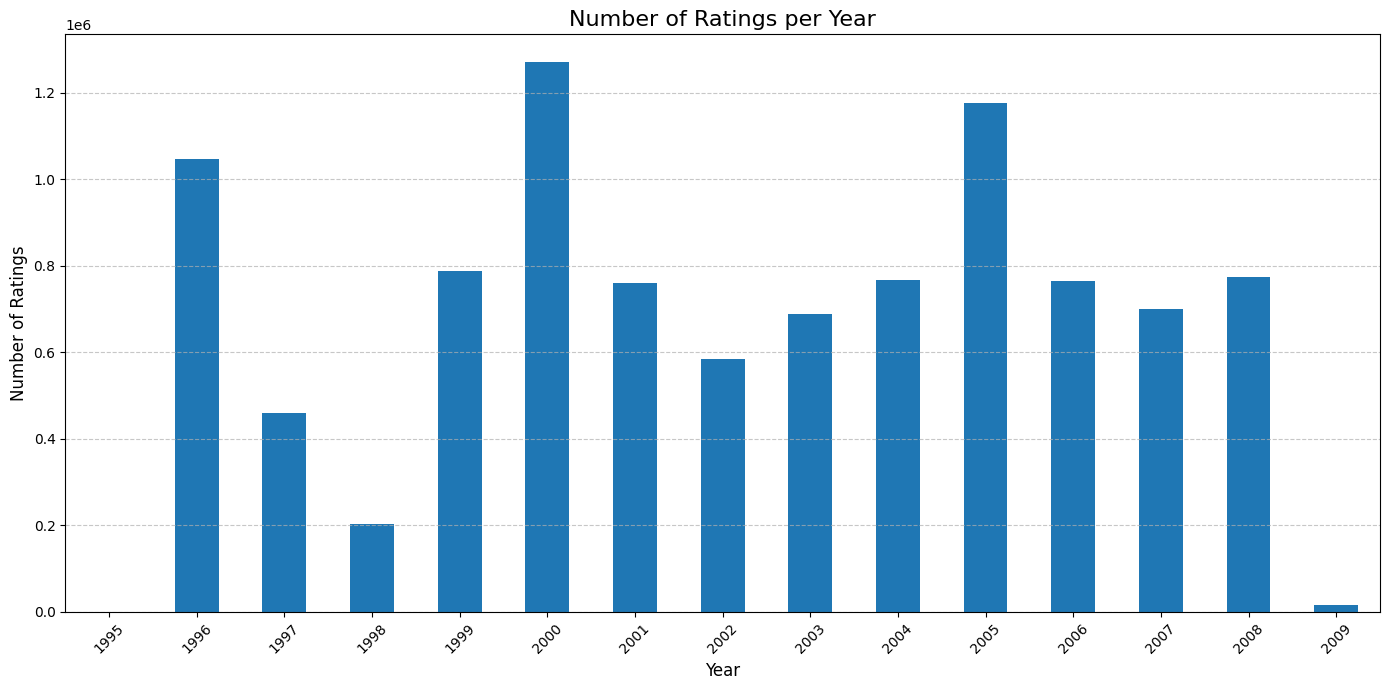

In [18]:
import matplotlib.pyplot as plt

ratings_per_year = ratings_df['Year'].value_counts().sort_index()
print('Ratings per Year:')
print(ratings_per_year.head())

plt.figure(figsize=(14, 7))
ratings_per_year.plot(kind='bar')
plt.title('Number of Ratings per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
To analyze the monthly trend of ratings, I will group the `ratings_df` by the 'Month' column, count the number of ratings for each month, and then visualize this data using a bar chart, as instructed.



Ratings per Month:
Month
1      836333
2      686578
3      827185
4      745484
5      739606
6      831456
7      891903
8      805278
9      630381
10     921694
11    1083606
12    1000550
Name: count, dtype: int64


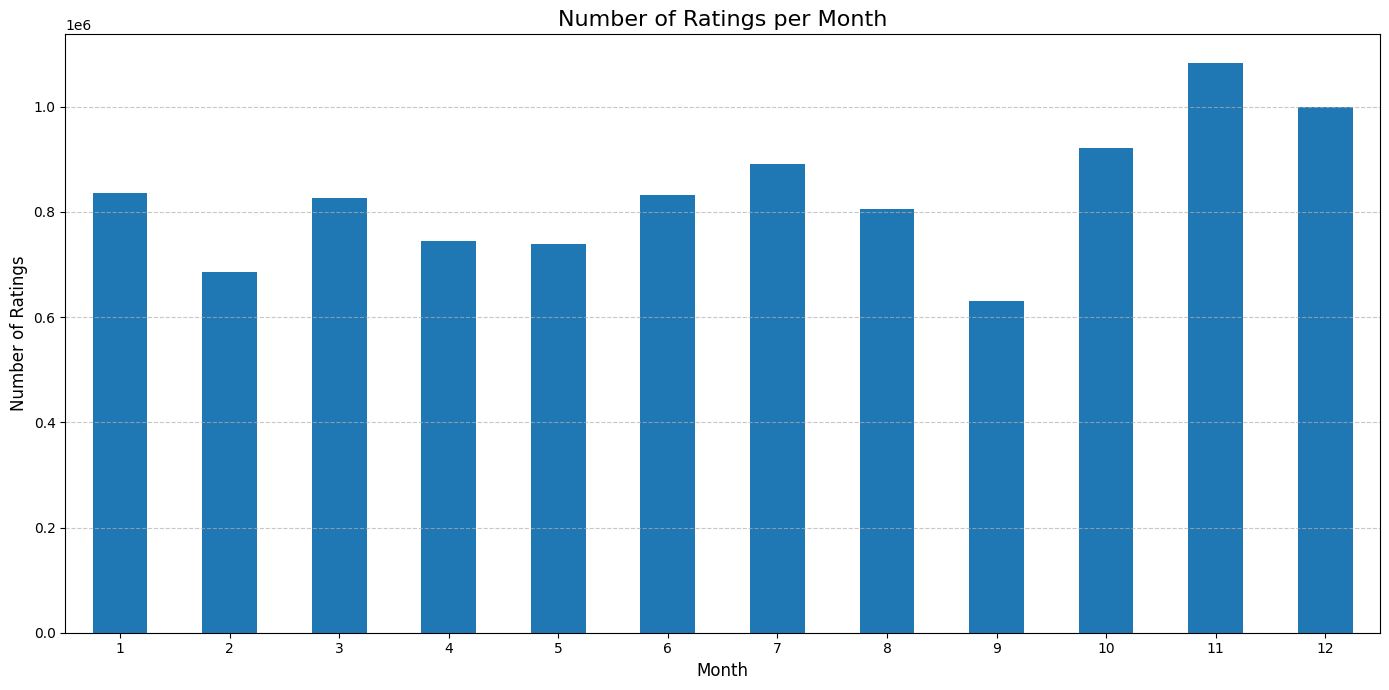

In [19]:
import matplotlib.pyplot as plt

ratings_per_month = ratings_df['Month'].value_counts().sort_index()
print('Ratings per Month:')
print(ratings_per_month)

plt.figure(figsize=(14, 7))
ratings_per_month.plot(kind='bar')
plt.title('Number of Ratings per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Key Findings

### Subtask:
根據上述 EDA 分析結果，提供關鍵發現和洞察，幫助進一步理解資料集的特性。


## Key Findings

### Subtask:
根據上述 EDA 分析結果，提供關鍵發現和洞察，幫助進一步理解資料集的特性。

#### Instructions
1. 審閱之前所有已完成的 EDA 步驟（資料概覽、評分分佈分析、電影類型分析、電影和用戶活躍度分析、評分時間趨勢分析）的結果和視覺化圖表。
2. 根據這些分析結果，撰寫一份簡潔的總結，突出資料集的主要特徵和任何顯著的模式或洞察。
3. 總結應涵蓋以下方面：資料集的整體結構和品質、評分的典型分佈、最受歡迎的電影類型、最活躍的電影和用戶，以及評分活動隨時間的趨勢。
4. 確保總結內容清晰、有條理，並用數據或觀察到的趨勢來支持關鍵發現。

### EDA 關鍵發現總結

**1. 資料集的整體結構與品質：**
*   `movies_df` 包含 10681 部電影的資訊，包括 `MovieID`、`Title` 和 `Genres`，所有欄位均無缺失值，資料品質良好。
*   `ratings_df` 是一個龐大的資料集，包含超過 1000 萬筆評分記錄，涉及 69878 個獨立用戶和 10677 部電影，同樣無缺失值。`Timestamp` 欄位已成功轉換為 datetime 格式。
*   兩個資料集都非常完整且乾淨，適合進一步分析。

**2. 評分的典型分佈：**
*   評分分佈顯示出明顯的偏態，用戶傾向於給予較高的評分 (3.0, 4.0, 5.0 星)。其中，4.0 星和 3.0 星的評分數量最多，其次是 5.0 星。
*   半星評分 (0.5, 1.5, 2.5, 3.5, 4.5) 的頻率相對較低，表明用戶更常使用整數評分。

**3. 最受歡迎的電影類型：**
*   電影類型分析顯示「Drama」、「Comedy」和「Thriller」是資料集中最常見的三大類型，遠超其他類型。
*   這反映了這些類型在電影市場中的普遍受歡迎程度，可能也是用戶評分較多的原因。

**4. 最活躍的電影和用戶：**
*   **最受歡迎的電影：** 電影 `MovieID 296` (Pulp Fiction (1994))、`MovieID 356` (Forrest Gump (1994)) 和 `MovieID 593` (The Silence of the Lambs (1991)) 獲得的評分數量最多，表明它們在用戶中擁有極高的知名度和互動。
*   **平均評分最高的電影：** 在考慮至少 50 個評分的前提下，電影 `MovieID 318` (The Shawshank Redemption (1994)) 擁有最高的平均評分 (4.457)，這顯示了其卓越的用戶滿意度。
*   **最活躍的用戶：** 存在少數超級活躍的用戶，他們貢獻了大量的評分。例如，`UserID 59269` 和 `UserID 67385` 的評分數量分別達到 7359 和 7047，遠高於其他用戶。

**5. 評分活動隨時間的趨勢：**
*   **年度趨勢：** 評分活動在 1996 年開始顯著增長，在 2000 年、2005 年和 2008 年達到多個高峰。2009 年的評分數量急劇下降，可能標誌著資料收集時間段的結束或資料來源的變化。
*   **月度趨勢：** 從月度來看，每個月的評分數量相對均勻，但在 11 月和 12 月通常會有較高的評分量，這可能與節假日期間用戶觀影和評分活動增加有關。

## Summary:

### Data Analysis Key Findings

*   **Data Quality and Completeness**: Both `movies_df` (10,681 movies) and `ratings_df` (over 10 million ratings from 69,878 unique users for 10,677 unique movies) are complete and clean, with no missing values. The `Timestamp` column in `ratings_df` was successfully converted to datetime objects, enabling time-series analysis.
*   **Rating Distribution Skew**: User ratings exhibit a clear positive skew, with a strong tendency to give higher ratings. Ratings of 4.0, 3.0, and 5.0 are the most frequent, while half-star ratings (e.g., 0.5, 1.5, 2.5) occur less often.
*   **Dominant Movie Genres**: "Drama" (5,339 movies), "Comedy" (3,703 movies), and "Thriller" (1,706 movies) are overwhelmingly the most common genres in the dataset, indicating their popularity and prevalence within the movie collection.
*   **Highly Rated and Popular Movies**:
    *   The most frequently rated movies include "Pulp Fiction (1994)", "Forrest Gump (1994)", and "The Silence of the Lambs (1991)", suggesting high engagement.
    *   When considering movies with at least 50 ratings, "The Shawshank Redemption (1994)" stands out with the highest average rating of 4.457, indicating exceptional user satisfaction.
*   **User Activity**: A small number of users are highly active, contributing a significant portion of the total ratings. For instance, `UserID 59269` provided 7,359 ratings, and `UserID 67385` contributed 7,047 ratings.
*   **Rating Activity Trends**:
    *   **Annual**: Rating activity saw significant growth starting in 1996, with peaks around 2000, 2005, and 2008, followed by a sharp decline in 2009, potentially marking the end of the data collection period.
    *   **Monthly**: While relatively even, rating volumes tend to be higher in November and December, possibly correlating with holiday seasons.

### Insights or Next Steps

*   The dataset's robust size, cleanliness, and detailed interaction data (ratings, genres, timestamps) make it highly suitable for developing sophisticated movie recommendation systems, which could leverage both content-based features (genres) and collaborative filtering (user-item interactions).
*   Understanding the popularity of certain genres and the tendency for higher ratings can inform content acquisition strategies or marketing efforts. For example, promoting movies in the "Drama", "Comedy", and "Thriller" categories or highlighting highly-rated films could boost user engagement.
